# Proyecto Módulo 1
06/03/2022
## Predicción del precio de acciones de Tesla en 2022
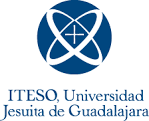

**Integrantes:**

*Alberto Marín*

  - Exp: 740526 Correo: alberto.marin@iteso.mx

*Ana Luisa Espinoza López*

  - Exp: 734753 Correo: ana.espinoza@iteso.mx


*Diego Rangel Orozco*

  - Exp: 735116 Correo: diego.rangel@iteso.mx

## Objetivos

1. *Objetivo General*
  - Elaborar un programa de regresión lineal para aproximar modelos matemáticos de distintos grados para predecir el precio de acciones de Tesla.
2. *Objetivos Específicos*
  - Mediante regresiones lineales en base al comportamiento de los datos extraídos del primer semestre del 2022 de la acción de TESLA desarrollar funciones primero, segundo, tercero y cuarto grado que se adapten lo mejor posible, minimizando el error entre la función y los datos.
  - Utilizar los modelos obtenidos para modelar el comportamiento de la acción en el segundo semestre de 2022 y comparar con los datos reales.

In [ ]:
# Instalacion de la API de datos de Yahoo Finance
!pip install yfinance

import pandas as pd
import yfinance as yf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

df = pd.DataFrame()
tickers = ['TSLA']
for ticker in tickers:
  df[ticker] = yf.Ticker(ticker).history(start ='2022-01-01',end='2022-06-01').Close  
  numdatos= len(df)
  df = pd.DataFrame(df)
  df = df.values.tolist()


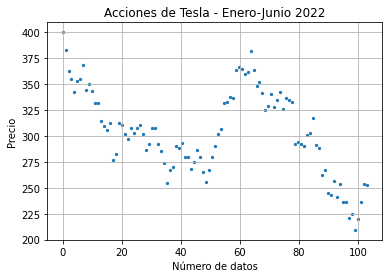

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, numdatos, numdatos)
y = df

plt.figure()
plt.title("Acciones de Tesla - Enero-Junio 2022")
plt.xlabel("Número de datos")
plt.ylabel("Precio")
plt.scatter(x,y, s =5)
plt.grid()

## Modelo que representa el problema

El objetivo es encontrar un modelo matemático que pueda predecir el comportamiento de la acción seis meses a futuro. Para medir que tan correcto es el ajuste de los datos entre los datos predecidos con el modelo y los reales se calcula el error cuadrático medio (RMSE). El RMSE es una medida estadística que mide el error entre dos conjuntos de datos, comparando el conjunto predicho con el conocido (Gabri, 2018). 

El cálculo del RMSE se realizó utilizando la siguiente fórmula:

$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2$$


De acuerdo con Gabri (2018), entre más chico sea el valor del error cuadrático medio, más cercanos son los valores entre el conjunto de datos predecido con el real. Por lo tanto, para obtener la mejor regresión lineal, el criterio de optimización de la función del error cuadrático medio debe ser de minimización. 

In [ ]:
import scipy.optimize as opt

In [ ]:
def fcost(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n,1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]

In [ ]:
m = len(y)
ones = np.ones([m,1])
x1 = np.reshape(x, [m, 1])
x2=np.reshape(x**2,[m,1])
x3=np.reshape(x**3,[m,1])
x4=np.reshape(x**4,[m,1])

X = np.hstack((ones, x1))
X2 = np.hstack((ones, x1,x2))
X3 = np.hstack((ones, x1,x2,x3))
X4 = np.hstack((ones, x1,x2,x3,x4))


In [ ]:
beta_inicial = np.random.rand(2, 1)
beta_i2 = np.random.rand(3, 1)
beta_i3 = np.random.rand(4, 1)
beta_i4 = np.random.rand(5, 1)


In [ ]:
y_vector = np.reshape(y, [m, 1])

In [ ]:
sol = opt.minimize(fcost, beta_inicial, args=(X, y_vector))
sol2=opt.minimize(fcost,beta_i2, args= (X2,y_vector))
sol3=opt.minimize(fcost,beta_i3, args= (X3,y_vector))
sol4=opt.minimize(fcost,beta_i4, args= (X4,y_vector))


<ipython-input-67-de124f92e5c3>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(fcost, beta_inicial, args=(X, y_vector))
<ipython-input-67-de124f92e5c3>:2: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol2=opt.minimize(fcost,beta_i2, args= (X2,y_vector))
<ipython-input-67-de124f92e5c3>:3: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol3=opt.minimize(fcost,beta_i3, args= (X3,y_vector))
<ipython-input-67-de124f92e5c3>:4: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be ra

In [ ]:
beta = np.reshape(sol.x, [2, 1])
beta2=np.reshape(sol2.x, [3, 1])
beta3=np.reshape(sol3.x, [4, 1])
beta4=np.reshape(sol4.x, [5, 1])


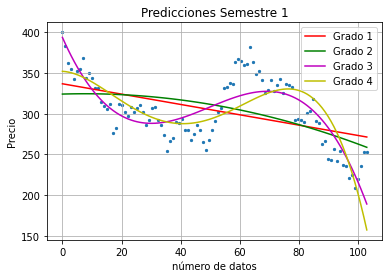

In [ ]:
plt.figure()
plt.title("Predicciones Semestre 1")
plt.scatter(x, y, s=5)
plt.plot(x, X @ beta, "r",label="Grado 1")
plt.plot(x, X2 @ beta2, "g", label="Grado 2")
plt.plot(x, X3 @ beta3, "m", label="Grado 3")
plt.plot(x, X4 @ beta4, "y", label="Grado 4")
plt.xlabel("número de datos")
plt.ylabel("Precio")
plt.legend(loc="best")
#plt.plot(x, 5 + x, "g")
plt.grid()

In [ ]:
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 134840.8850671451
        x: [ 3.367e+02 -6.338e-01]
      nit: 9
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 1.604e-02 -2.334e-04]
            [-2.334e-04  4.764e-06]]
     nfev: 45
     njev: 15

In [ ]:
def f1(x):
  return sol.x[0] + (sol.x[1])*x 

In [ ]:
sol2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 131354.4966951404
        x: [ 3.241e+02  1.096e-01 -7.217e-03]
      nit: 6
      jac: [-1.953e-03 -1.055e-01 -7.469e+00]
 hess_inv: [[ 1.771e+00 -7.369e-02  5.915e-04]
            [-7.369e-02  3.083e-03 -2.484e-05]
            [ 5.915e-04 -2.484e-05  2.007e-07]]
     nfev: 142
     njev: 34

In [ ]:
def f2(x):
  return sol2.x[0] + (sol2.x[1])*x +(sol2.x[2])*x**2

In [ ]:
sol3

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 51817.12498026175
        x: [ 3.936e+02 -8.192e+00  1.953e-01 -1.311e-03]
      nit: 15
      jac: [ 9.766e-04  1.172e-02  2.876e-01  2.884e+01]
 hess_inv: [[ 2.315e+00 -1.480e-01  2.757e-03 -1.561e-05]
            [-1.480e-01  9.473e-03 -1.765e-04  9.990e-07]
            [ 2.757e-03 -1.765e-04  3.297e-06 -1.870e-08]
            [-1.561e-05  9.990e-07 -1.870e-08  1.063e-10]]
     nfev: 218
     njev: 43

In [ ]:
def f3(x):
  return sol3.x[0] + (sol3.x[1])*x +(sol3.x[2])*x**2 +(sol3.x[3])*x**3

In [ ]:
sol4


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 80612.75417906864
        x: [ 3.520e+02 -1.891e-01 -1.462e-01  3.732e-03 -2.400e-05]
      nit: 29
      jac: [-5.918e+01 -4.126e+03 -3.256e+05 -1.821e+07 -2.709e+08]
 hess_inv: [[ 9.305e-02 -1.016e-02 ... -3.804e-06  1.537e-08]
            [-1.016e-02  1.621e-03 ...  7.989e-07 -3.498e-09]
            ...
            [-3.804e-06  7.989e-07 ...  4.935e-10 -2.309e-12]
            [ 1.537e-08 -3.498e-09 ... -2.309e-12  1.103e-14]]
     nfev: 444
     njev: 72

In [ ]:
def f4(x):
  return sol4.x[0] + (sol4.x[1])*x +(sol4.x[2])*x**2 +(sol4.x[3])*x**3 +(sol4.x[4])*x**4

<BarContainer object of 4 artists>

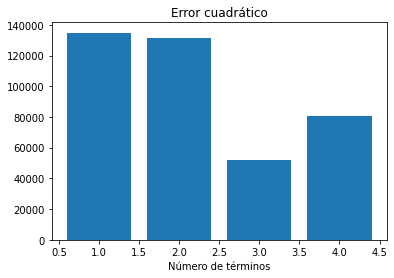

In [ ]:
plt.figure()
plt.title("Error cuadrático")
plt.xlabel("Número de términos")
plt.bar([1,2,3,4],[sol.fun,sol2.fun,sol3.fun,sol4.fun,])

Se obtuvieron cuatro modelos de regresión para los datos del primer semestre. De acuerdo a los valores de error cuadrático de cada modelo, hipotéticamente el mejor modelo para predecir el precio de las acciones el siguiente semestre es el de grado 3.

### Evaluación de los modelos en el segundo semestre

In [ ]:
import numpy as np

df2 = pd.DataFrame()
tickers = ['TSLA']
for ticker in tickers:
  df2[ticker] = yf.Ticker(ticker).history(start ='2022-06-01',end='2023-01-01').Close  
  numdatos= len(df2)
  df2 = pd.DataFrame(df2)
  df2 = df2.values.tolist()

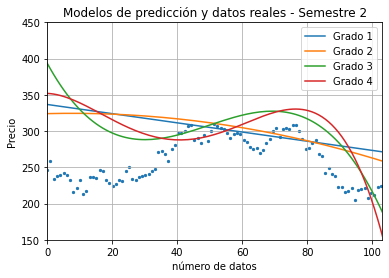

In [ ]:
x = np.linspace(0, numdatos, numdatos)
y = df2

plt.figure()
plt.title("Modelos de predicción y datos reales - Semestre 2")
plt.scatter(x,y, s =5)
plt.plot(x,f1(x),label="Grado 1")
plt.plot(x,f2(x),label="Grado 2")
plt.plot(x,f3(x),label="Grado 3")
plt.plot(x,f4(x),label="Grado 4")
plt.xlabel("número de datos")
plt.ylabel("Precio")
plt.legend(loc="best")
plt.ylim([150,450])
plt.xlim([0,103])
plt.grid()

#### Error cuadrático de cada modelo para datos del segundo semestre

El vector y con los precios del siguiente semestre tiene más datos que el del semestre anterior. Para poder calcular el error cuadrático entre las predicciones con los precios de la acción de Tesla del segundo semestre se tendrá que tomar el mismo número de datos que el número de renglones de las matrices X, X2, X3 y X4.

In [ ]:
y2=[]
for i in range (0,m):
  y2.append(y[i])

Y=np.array(y2)
y_v2=np.reshape(Y,[m,1])

In [ ]:
es2_1=fcost(beta,X,y_v2)
es2_2=fcost(beta2,X2,y_v2)
es2_3=fcost(beta3,X3,y_v2)
es2_4=fcost(beta4,X4,y_v2)

<BarContainer object of 4 artists>

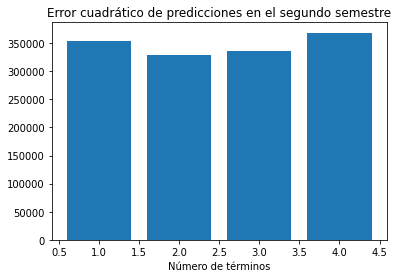

In [ ]:
plt.figure()
plt.title("Error cuadrático de predicciones en el segundo semestre")
plt.xlabel("Número de términos")
plt.bar([1,2,3,4],[es2_1,es2_2,es2_3,es2_4])

Se pretendía evaluar qué tan efectivos serían los modelos de regresión de un semestre para predecir el siguiente semestre. Evaluando el error cuadrático entre los datos reales con las predicciones se obtuvo que el mejor modelo fue el de segundo grado. No obstante, el error cuadrático fue casi idéntico en los cuatro modelos, además de tener un valor bastante alto. Esto indica que los modelos no fueron óptimos para predecir los precios de las acciones de Tesla en el siguiente semestre.

In [ ]:
import numpy as np

df3 = pd.DataFrame()
tickers = ['TSLA']
for ticker in tickers:
  df3[ticker] = yf.Ticker(ticker).history(start ='2022-01-01',end='2022-12-31').Close  
  numdatos3= len(df3)
  df3 = pd.DataFrame(df3)
  df3 = df3.values.tolist()

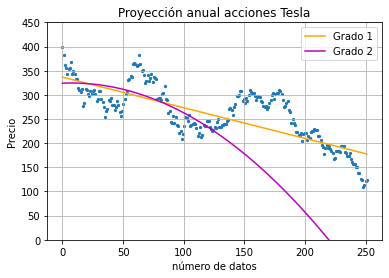

In [ ]:
x3 = np.linspace(0, numdatos3, numdatos3)
y3 = df3

plt.figure()
plt.title("Proyección anual acciones Tesla")
plt.scatter(x3,y3, s =5)
plt.plot(x3,f1(x3),"orange",label="Grado 1")
plt.plot(x3,f2(x3),"m",label="Grado 2")
#plt.plot(x3,f3(x3),label="Grado 3")
#plt.plot(x3,f4(x3),label="Grado 4")
plt.xlabel("número de datos")
plt.ylabel("Precio")
plt.ylim([0,450])
plt.legend(loc="best")

plt.grid()

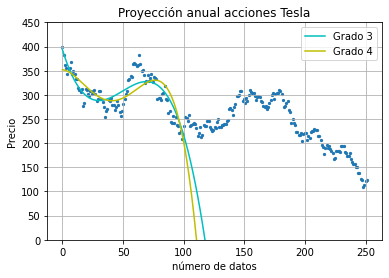

In [ ]:
x3 = np.linspace(0, numdatos3, numdatos3)
y3 = df3

plt.figure()
plt.title("Proyección anual acciones Tesla")
plt.scatter(x3,y3, s =5)
#plt.plot(x3,f1(x3),"orange",label="Grado 1")
#plt.plot(x3,f2(x3),"m",label="Grado 2")
plt.plot(x3,f3(x3),"c",label="Grado 3")
plt.plot(x3,f4(x3),"y",label="Grado 4")
plt.xlabel("número de datos")
plt.ylabel("Precio")
plt.ylim([0,450])
plt.legend(loc="best")

plt.grid()

<BarContainer object of 2 artists>

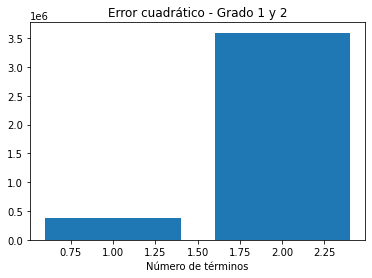

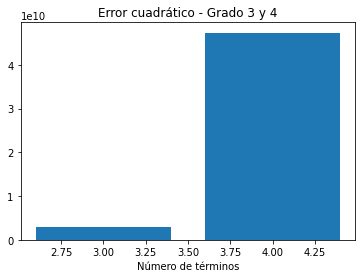

In [ ]:
m3=len(y3)
ones3=np.ones([m3,1])
x1_anual= np.reshape(x3, [m3, 1])
x2_anual= np.reshape(x3**2, [m3, 1])
x3_anual= np.reshape(x3**3, [m3, 1])
x4_anual= np.reshape(x3**4, [m3, 1])
X1_a=np.hstack((ones3,x1_anual))
X2_a=np.hstack((ones3,x1_anual,x2_anual))
X3_a=np.hstack((ones3,x1_anual,x2_anual,x3_anual))
X4_a=np.hstack((ones3,x1_anual,x2_anual,x3_anual,x4_anual))
y_v3=np.reshape(y3,[m3,1])
plt.figure()
plt.title("Error cuadrático - Grado 1 y 2")
plt.xlabel("Número de términos")
plt.bar([1,2],[fcost(beta,X1_a,y_v3),fcost(beta2,X2_a,y_v3)])
plt.figure()
plt.title("Error cuadrático - Grado 3 y 4")
plt.xlabel("Número de términos")
plt.bar([3,4],[fcost(beta3,X3_a,y_v3),fcost(beta4,X4_a,y_v3)])


**Nota: ** Se separaron los gráficos para poder apreciar la magnitud de los errores y las tendencias de cada predicción.

## Solución al problema

Al evaluar el error cuadrático de las funciones, se planteó la hipótesis de que el mejor modelo para realizar la predicción sería el de grado 3. Sin embargo, al comparar los modelos propuestos con los datos reales del segundo semestre, el modelo con menor error cuadrático fue el de segundo grado. Finalmente, cuando se compararon los modelos con el conjunto completo de datos, la función que mejor ajustaba el precio de las acciones fue el modelo de grado 1.

## Conclusión:

Las regresiones lineales utilizando una parte de los datos para predecir el resto no fueron efectivas. Esto sugiere que el comportamiento de los datos es no es lineal, por lo que este tipo de regresión no sería efectivo para encontrar un modelo certero y confiable. De acuerdo con IBM (2022), las regresiones no lineales permite la estimación de modelos en que la relación entre las variables dependientes e independientes son arbitrarias. Las regresiones no lineales se utilizan cuando los parámetros lineales no sean efectivos y que se necesite que el modelo adopte formas diferentes a una ecuación básica (Minitab, 2021). Si el comportamiento de datos de las acciones fuera lineal, los datos del segundo semestre habrían seguido la tendencia del modelo de grado 3, que era el de menor error. No obstante, al contrastar el error cuadrático en los modelos evaluados en ambos semestres por separado y en conjunto se pudo observar que el modelo de menor error no era constante. 

## Referencias

-  G. (2018, 22 mayo). ¿Qué es el error cuadrático medio RMSE? El blog de franz. https://acolita.com/que-es-el-error-cuadratico-medio-rmse/
- Yahoo maakt deel uit van de Yahoo-merkenfamilie. (s. f.). https://finance.yahoo.com/quote/TSLA/history?p=TSLA
- Explicación Regresión no lineal - Minitab. (2021). (C) Minitab, LLC. All rights Reserved. 2023. https://support.minitab.com/es-mx/minitab/21/help-and-how-to/statistical-modeling/regression/supporting-topics/nonlinear-regression/understanding-nonlinear-regression/
- IBM.(2022). Regresión no lineal.. https://www.ibm.com/docs/es/spss-statistics/saas?topic=regression-nonlinear